In [2]:
#importing python classes and packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV #grid class for tuning each algorithm
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xg
import catboost as cb

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM #class for LSTM training
import os
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from math import sqrt
from keras.layers import Activation, Flatten
from keras.layers import Conv2D #class for CNN
from keras.layers import  MaxPooling2D
from keras.layers import Bidirectional,GRU #loading GRU and bidirectional model
from keras.layers import Dropout

In [3]:
#load and display meal sales dataset values
dataset = pd.read_csv("Dataset/train.csv")
dataset.fillna(0, inplace = True)
dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [4]:
#load and display fulfilment center dataset values
center = pd.read_csv("Dataset/fulfilment_center_info.csv")
center.fillna(0, inplace = True)
center

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [5]:
#merge both dataset to find orders based on regison, center 
dataset = dataset.merge(center, left_on = 'center_id', right_on = 'center_id', how="left")
dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5


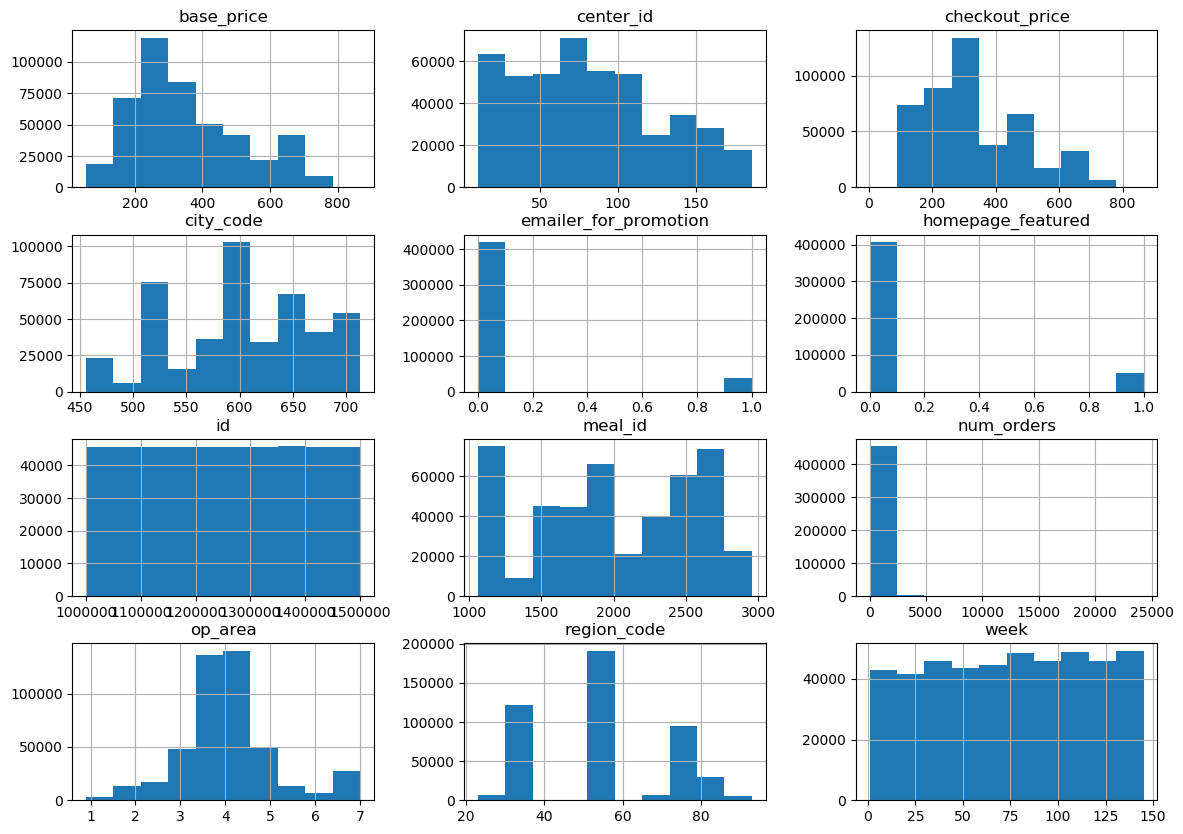

In [6]:
#features distribution graph
dataset.hist(figsize=(14,10))
plt.show()

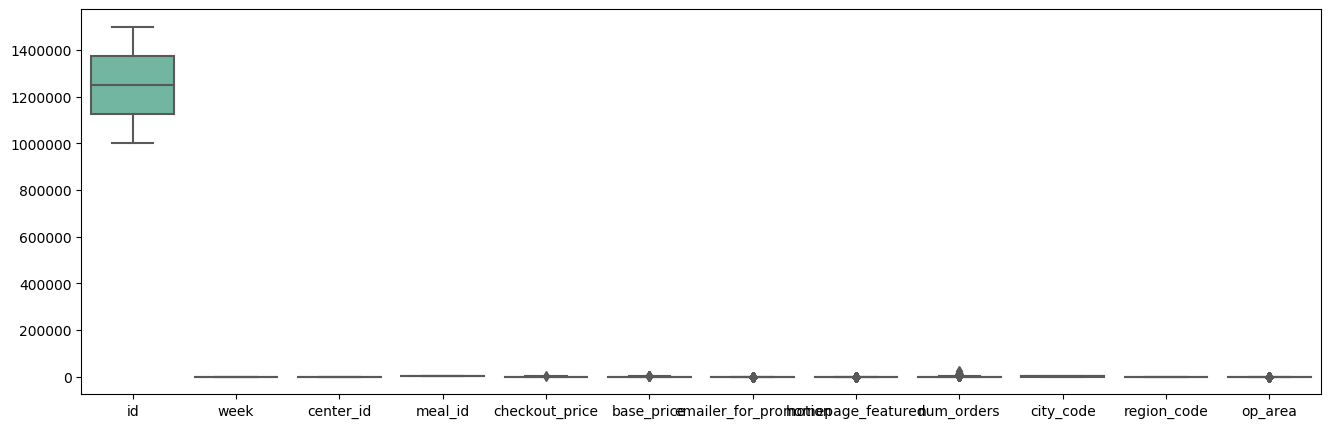

In [7]:
#all features box plot which will depict range of each features max and min values
plt.figure(figsize=(16, 5))
sns.boxplot(data = dataset, palette="Set2")


Text(0.5, 0, 'Num Orders')

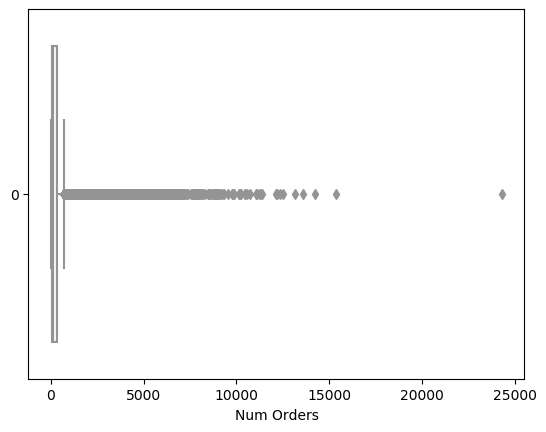

In [8]:
#num orders graph
sns.boxplot(data = dataset['num_orders'], orient="h", palette="vlag")
plt.xlabel("Num Orders")

Text(0.5, 1.0, 'Number of orders Received by each Center')

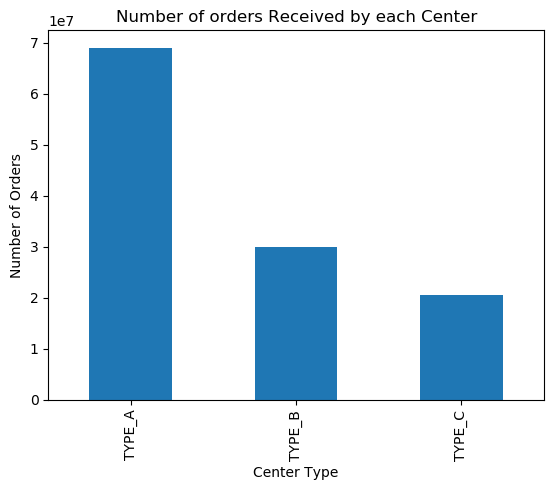

In [9]:
#finding and plotting center type with high number of orders
temp = dataset.groupby(['center_type'])['num_orders'].sum().plot(kind='bar')
plt.xlabel("Center Type")
plt.ylabel("Number of Orders")
plt.title("Number of orders Received by each Center")

Text(0.5, 1.0, 'Top 15 Centers with Highest Number of Orders')

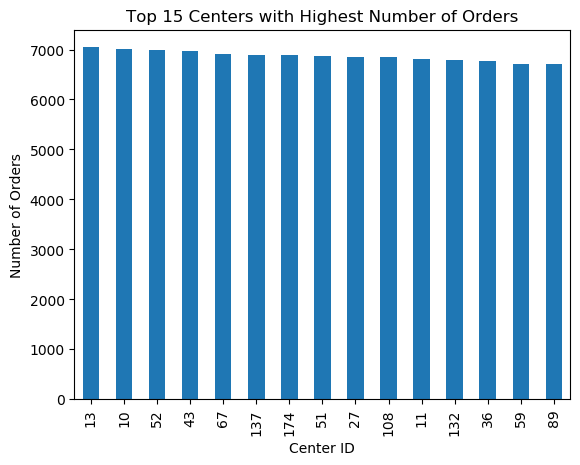

In [10]:
#finding and plotting top 15 centers with high number of orders
temp = dataset.groupby(['center_id'])['num_orders'].size().nlargest(15).plot(kind='bar')
plt.xlabel("Center ID")
plt.ylabel("Number of Orders")
plt.title("Top 15 Centers with Highest Number of Orders")

Text(0.5, 1.0, 'Number of Center working under each Center Type')

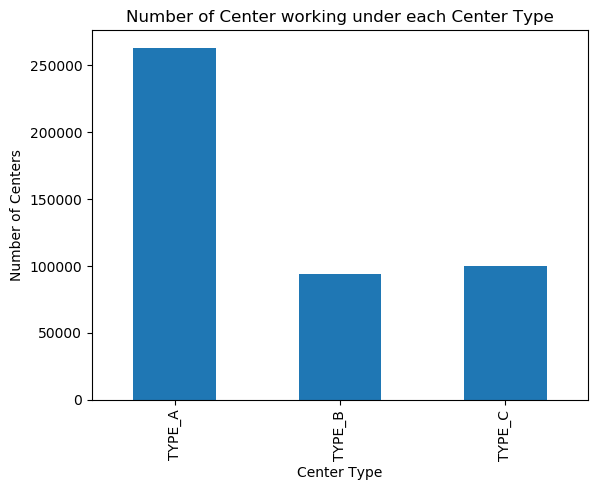

In [11]:
#finding and plotting number of centers working under eacg center type
temp = dataset.groupby(['center_type'])['center_id'].size().plot(kind='bar')
plt.xlabel("Center Type")
plt.ylabel("Number of Centers")
plt.title("Number of Center working under each Center Type")

Text(0.5, 1.0, 'Number of orders Received by each Region')

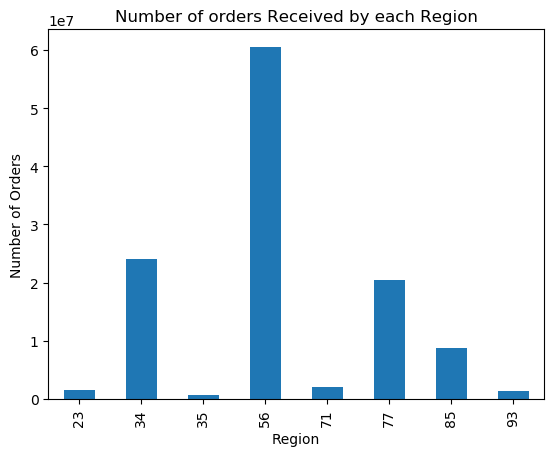

In [12]:
#finding number of orders from each region
temp = dataset.groupby(['region_code'])['num_orders'].sum().plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Number of Orders")
plt.title("Number of orders Received by each Region")

Text(0.5, 1.0, 'Number of orders in Each Week')

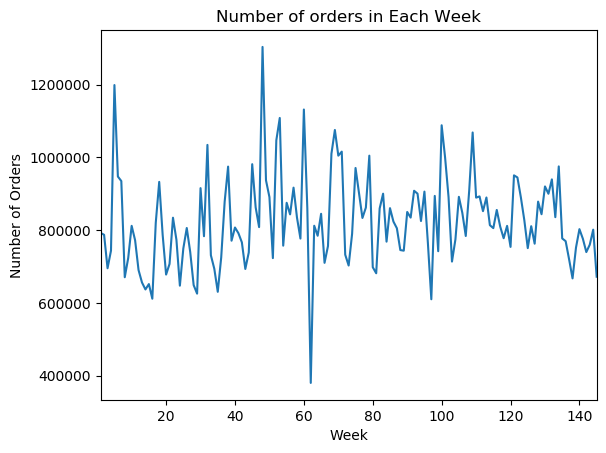

In [13]:
#finding number of orders from each region
temp = dataset.groupby(['week'])['num_orders'].sum().plot()
plt.xlabel("Week")
plt.ylabel("Number of Orders")
plt.title("Number of orders in Each Week")

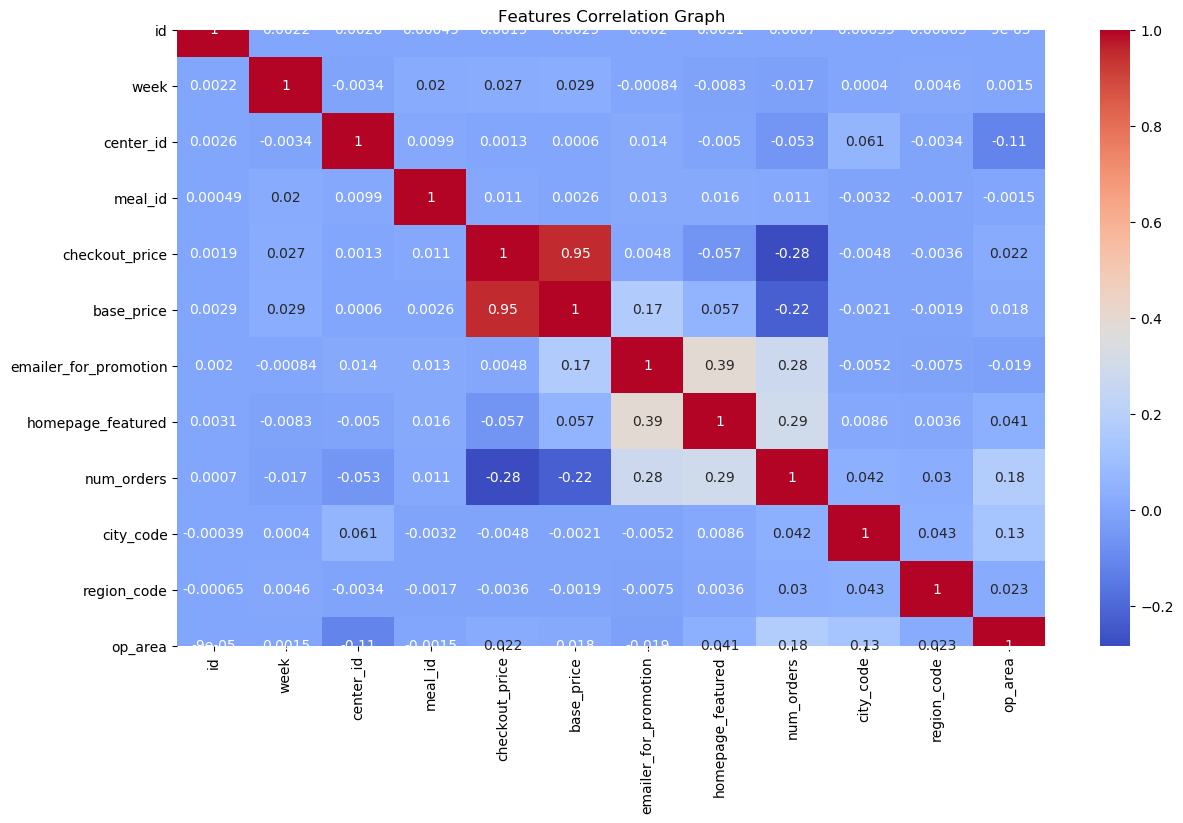

In [14]:
#find and plot correlation graph
plt.figure(figsize=(14,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True)
plt.title("Features Correlation Graph")
plt.show()

In [15]:
#extra features calculation
max_base_price = np.max(dataset['base_price'])
base_price_mean = np.mean(dataset['base_price'])
min_base_price = np.min(dataset['base_price'])
center_unique, center_count = np.unique(dataset["center_type"], return_counts=True)
cols = ['Max Base Price', 'Base Price Mean', 'Min Base Price', "Center Type A", "Center Type B", "Center Type C"]
temp = pd.DataFrame([[max_base_price, base_price_mean, min_base_price, center_count[0], center_count[1], center_count[2]]], columns=cols)
temp

,Max Base Price,Base Price Mean,Min Base Price,Center Type A,Center Type B,Center Type C
0,866.27,354.156627,55.35,262881,94074,99593


In [16]:
#dataset preprocessing
lag_data = dataset[(dataset['week'] >= 1) & (dataset['week'] <= 10) ]
Y = lag_data['num_orders'].ravel()
Y = (Y * 0.5) + (1 - 0.5) * (Y - 1) #calculating Y target data
Y = Y.reshape(-1, 1)
lag_data.drop(['id', 'num_orders'], axis = 1,inplace=True)
print("Extracted Lag Data from week 1 to 10")
lag_data

Extracted Lag Data from week 1 to 10


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area
0,1,55,1885,136.83,152.29,0,0,647,56,TYPE_C,2.0
1,1,55,1993,136.83,135.83,0,0,647,56,TYPE_C,2.0
2,1,55,2539,134.86,135.86,0,0,647,56,TYPE_C,2.0
3,1,55,2139,339.50,437.53,0,0,647,56,TYPE_C,2.0
4,1,55,2631,243.50,242.50,0,0,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...
28600,10,61,1525,246.41,281.33,0,0,473,77,TYPE_A,4.5
28601,10,61,2704,243.53,280.33,0,0,473,77,TYPE_A,4.5
28602,10,61,2492,447.23,445.23,0,0,473,77,TYPE_A,4.5
28603,10,61,1543,505.43,503.43,0,1,473,77,TYPE_A,4.5


In [17]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
lag_data['center_type'] = pd.Series(le.fit_transform(lag_data['center_type'].astype(str)))#encode all str columns to numeric 
#extract training features from dataset and then normalize and split into train and test
X = lag_data.values #get training features from dataset
sc1 = MinMaxScaler(feature_range = (0, 1))
sc2 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#normalize train features
Y = sc2.fit_transform(Y)
X = X[0:2000]
Y = Y[0:2000]
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset after LIGHTGBM selection : "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))

Total records found in dataset = 2000
Total features found in dataset after LIGHTGBM selection : 11
80% dataset for training : 1600
20% dataset for testing  : 400


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
#now define global variables for mae, mape, rmse and r2 mean 
# abouslute error,root mean square error , mean abouslute percentage error,root mean squrae logarithmic error
mae = []
rmse = []
mape = []
rmsle = []

In [19]:
#function to calculate MSE and other metrics
def calculateMetrics(algorithm, predict, test_labels):
    predict = predict.reshape(-1, 1)
    predict = sc2.inverse_transform(predict)
    test_label = sc2.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()
    rvalue = np.sqrt(metrics.mean_squared_log_error(test_label, predict))
    mse_value = mean_squared_error(test_label, predict)
    rmse_value = sqrt(mse_value)
    mae_value = mean_absolute_error(test_label, predict)
    mape_value = round(mean_absolute_percentage_error(test_labels[0:30], predict[0:30]), 3) 
    mae.append(mae_value)
    rmse.append(rmse_value)
    mape.append(mape_value)
    rmsle.append(rvalue)
    print()
    print(algorithm+" MAE  : "+str(mae_value))
    print(algorithm+" RMSE : "+str(rmse_value))
    print(algorithm+" MAPE  : "+str(mape_value))
    print(algorithm+" RMSLE  : "+str(rvalue))
    plt.plot(test_label, color = 'red', label = 'Original Sales')
    plt.plot(predict, color = 'green', label = 'Predicted Sales')
    plt.title(algorithm+' Sales Prediction')
    plt.xlabel('Test Data')
    plt.ylabel('Predicted Sales')
    plt.legend()
    plt.show()


Random Forest MAE  : 111.01527499999999
Random Forest RMSE : 189.10709173970707
Random Forest MAPE  : 187883.215
Random Forest RMSLE  : 0.7887162512923452


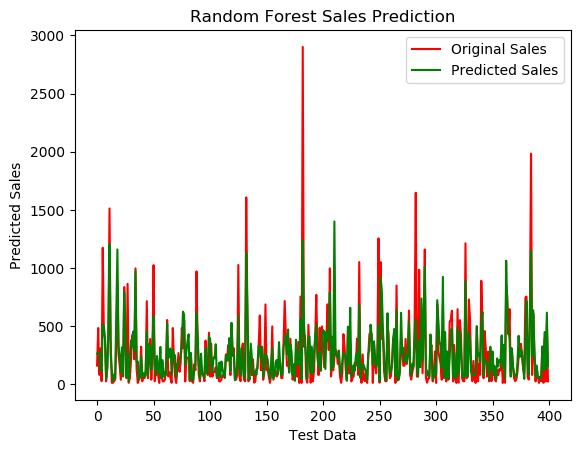

In [20]:
#train RandomForest algorithm by tuning its parameters
tuning_param = {'n_estimators' : (20, 50, 100), 'max_features' : ('sqrt','log2')}
rf_cls = RandomForestRegressor() #creasting random Forest object
tuned_rf = GridSearchCV(rf_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_rf.fit(X_train, y_train.ravel())#now train Random Forest
predict = tuned_rf.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Random Forest", predict, y_test) #evaluate Random Forest model by calling caculate metrics function


Gradient Boosting MAE  : 114.94255125820484
Gradient Boosting RMSE : 186.6352368000979
Gradient Boosting MAPE  : 195147.784
Gradient Boosting RMSLE  : 0.8213032825611533


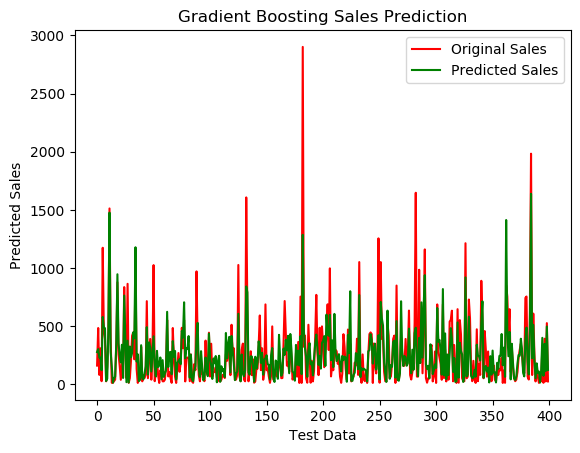

In [21]:
#train gradient boosting algorithm by tuning its parameters
tuning_param = {'n_estimators' : (20, 50, 100), 'loss' : ('squared_error', 'absolute_error')}
gb_cls = GradientBoostingRegressor() #creasting gradient Boosting object
tuned_gb = GridSearchCV(gb_cls, tuning_param, cv=5)#defining RF with tuned parameters
tuned_gb.fit(X_train, y_train.ravel())#now train Random Forest
predict = tuned_gb.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Gradient Boosting", np.abs(predict), np.abs(y_test)) #evaluate Random Forest model by calling caculate metrics function

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 10
[LightGBM] [Info] Start training from score 0.010606

Light GBM MAE  : 106.90892567983643
Light GBM RMSE : 181.26739614679494
Light GBM MAPE  : 150405.198
Light GBM RMSLE  : 0.742028987143179


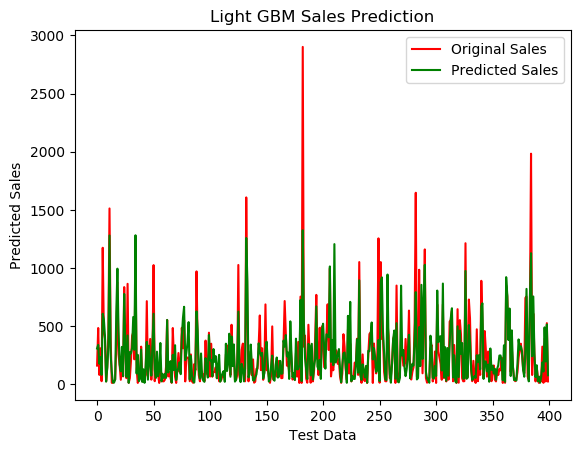

In [22]:
#train LightGBM algorithm
light_gb = lgb.LGBMRegressor()
light_gb.fit(X_train, y_train.ravel()) #train LGBM on X and Y training data
predict = light_gb.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("Light GBM", np.abs(predict), np.abs(y_test)) #evaluate LGBM model by calling caculate metrics function

Learning rate set to 0.044099
0:	learn: 0.0133731	total: 157ms	remaining: 2m 36s
1:	learn: 0.0132135	total: 160ms	remaining: 1m 20s
2:	learn: 0.0130466	total: 164ms	remaining: 54.5s
3:	learn: 0.0128462	total: 169ms	remaining: 42s
4:	learn: 0.0126550	total: 173ms	remaining: 34.4s
5:	learn: 0.0124991	total: 177ms	remaining: 29.3s
6:	learn: 0.0123460	total: 180ms	remaining: 25.6s
7:	learn: 0.0121800	total: 184ms	remaining: 22.8s
8:	learn: 0.0120446	total: 187ms	remaining: 20.5s
9:	learn: 0.0119329	total: 189ms	remaining: 18.7s
10:	learn: 0.0118024	total: 192ms	remaining: 17.2s
11:	learn: 0.0116673	total: 194ms	remaining: 16s
12:	learn: 0.0115461	total: 197ms	remaining: 15s
13:	learn: 0.0114288	total: 199ms	remaining: 14s
14:	learn: 0.0113375	total: 201ms	remaining: 13.2s
15:	learn: 0.0112406	total: 204ms	remaining: 12.5s
16:	learn: 0.0111323	total: 205ms	remaining: 11.9s
17:	learn: 0.0110012	total: 209ms	remaining: 11.4s
18:	learn: 0.0108937	total: 212ms	remaining: 11s
19:	learn: 0.010782

189:	learn: 0.0063664	total: 728ms	remaining: 3.1s
190:	learn: 0.0063551	total: 731ms	remaining: 3.1s
191:	learn: 0.0063420	total: 734ms	remaining: 3.09s
192:	learn: 0.0063336	total: 736ms	remaining: 3.08s
193:	learn: 0.0063192	total: 739ms	remaining: 3.07s
194:	learn: 0.0063099	total: 741ms	remaining: 3.06s
195:	learn: 0.0062974	total: 743ms	remaining: 3.05s
196:	learn: 0.0062794	total: 744ms	remaining: 3.03s
197:	learn: 0.0062624	total: 746ms	remaining: 3.02s
198:	learn: 0.0062522	total: 748ms	remaining: 3.01s
199:	learn: 0.0062350	total: 750ms	remaining: 3s
200:	learn: 0.0062289	total: 761ms	remaining: 3.02s
201:	learn: 0.0062215	total: 762ms	remaining: 3.01s
202:	learn: 0.0062142	total: 765ms	remaining: 3s
203:	learn: 0.0062055	total: 766ms	remaining: 2.99s
204:	learn: 0.0061899	total: 768ms	remaining: 2.98s
205:	learn: 0.0061813	total: 771ms	remaining: 2.97s
206:	learn: 0.0061698	total: 772ms	remaining: 2.96s
207:	learn: 0.0061636	total: 775ms	remaining: 2.95s
208:	learn: 0.006151

383:	learn: 0.0049033	total: 1.3s	remaining: 2.08s
384:	learn: 0.0048980	total: 1.3s	remaining: 2.07s
385:	learn: 0.0048930	total: 1.3s	remaining: 2.07s
386:	learn: 0.0048899	total: 1.3s	remaining: 2.06s
387:	learn: 0.0048839	total: 1.31s	remaining: 2.06s
388:	learn: 0.0048755	total: 1.31s	remaining: 2.05s
389:	learn: 0.0048717	total: 1.31s	remaining: 2.05s
390:	learn: 0.0048697	total: 1.31s	remaining: 2.04s
391:	learn: 0.0048669	total: 1.31s	remaining: 2.04s
392:	learn: 0.0048581	total: 1.31s	remaining: 2.03s
393:	learn: 0.0048525	total: 1.32s	remaining: 2.02s
394:	learn: 0.0048499	total: 1.32s	remaining: 2.02s
395:	learn: 0.0048448	total: 1.32s	remaining: 2.01s
396:	learn: 0.0048417	total: 1.32s	remaining: 2.01s
397:	learn: 0.0048355	total: 1.32s	remaining: 2s
398:	learn: 0.0048332	total: 1.32s	remaining: 1.99s
399:	learn: 0.0048274	total: 1.32s	remaining: 1.99s
400:	learn: 0.0048210	total: 1.33s	remaining: 1.98s
401:	learn: 0.0048182	total: 1.33s	remaining: 1.98s
402:	learn: 0.00481

600:	learn: 0.0040976	total: 1.88s	remaining: 1.25s
601:	learn: 0.0040921	total: 1.88s	remaining: 1.24s
602:	learn: 0.0040908	total: 1.88s	remaining: 1.24s
603:	learn: 0.0040879	total: 1.89s	remaining: 1.24s
604:	learn: 0.0040847	total: 1.89s	remaining: 1.23s
605:	learn: 0.0040820	total: 1.89s	remaining: 1.23s
606:	learn: 0.0040802	total: 1.89s	remaining: 1.23s
607:	learn: 0.0040794	total: 1.89s	remaining: 1.22s
608:	learn: 0.0040754	total: 1.9s	remaining: 1.22s
609:	learn: 0.0040700	total: 1.9s	remaining: 1.21s
610:	learn: 0.0040680	total: 1.9s	remaining: 1.21s
611:	learn: 0.0040654	total: 1.9s	remaining: 1.21s
612:	learn: 0.0040614	total: 1.9s	remaining: 1.2s
613:	learn: 0.0040581	total: 1.91s	remaining: 1.2s
614:	learn: 0.0040560	total: 1.91s	remaining: 1.2s
615:	learn: 0.0040483	total: 1.91s	remaining: 1.19s
616:	learn: 0.0040455	total: 1.91s	remaining: 1.19s
617:	learn: 0.0040420	total: 1.92s	remaining: 1.19s
618:	learn: 0.0040392	total: 1.92s	remaining: 1.18s
619:	learn: 0.004030

814:	learn: 0.0035284	total: 2.46s	remaining: 558ms
815:	learn: 0.0035253	total: 2.46s	remaining: 555ms
816:	learn: 0.0035207	total: 2.47s	remaining: 552ms
817:	learn: 0.0035199	total: 2.47s	remaining: 549ms
818:	learn: 0.0035175	total: 2.47s	remaining: 546ms
819:	learn: 0.0035162	total: 2.47s	remaining: 543ms
820:	learn: 0.0035128	total: 2.48s	remaining: 540ms
821:	learn: 0.0035110	total: 2.48s	remaining: 537ms
822:	learn: 0.0035095	total: 2.48s	remaining: 533ms
823:	learn: 0.0035071	total: 2.48s	remaining: 530ms
824:	learn: 0.0035040	total: 2.48s	remaining: 527ms
825:	learn: 0.0035008	total: 2.48s	remaining: 524ms
826:	learn: 0.0034987	total: 2.49s	remaining: 520ms
827:	learn: 0.0034981	total: 2.49s	remaining: 517ms
828:	learn: 0.0034965	total: 2.49s	remaining: 514ms
829:	learn: 0.0034947	total: 2.5s	remaining: 511ms
830:	learn: 0.0034910	total: 2.5s	remaining: 508ms
831:	learn: 0.0034897	total: 2.5s	remaining: 505ms
832:	learn: 0.0034877	total: 2.5s	remaining: 502ms
833:	learn: 0.00


CatBoost MAE  : 100.75766621530548
CatBoost RMSE : 175.99829949044758
CatBoost MAPE  : 218799.57
CatBoost RMSLE  : 0.7383871081243603


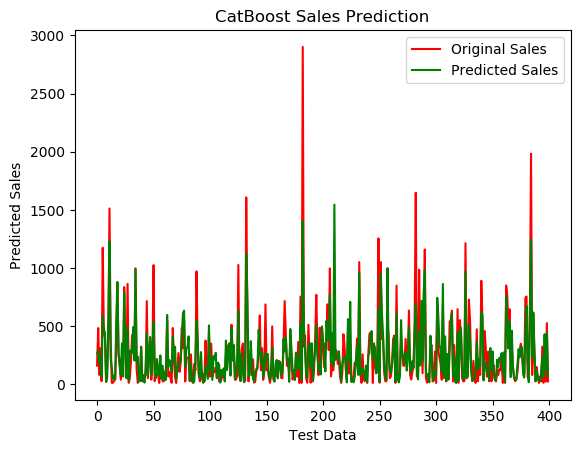

In [23]:
#train catboost algorithm
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train.ravel()) #train catboost on X and Y training data
predict = catboost.predict(X_test) #perfrom prediction on test data
predict = predict.reshape(-1, 1)
calculateMetrics("CatBoost", np.abs(predict), np.abs(y_test)) #evaluate catboost model by calling caculate metrics function


XGBoost MAE  : 111.35561547994614
XGBoost RMSE : 208.62212604820587
XGBoost MAPE  : 175935.141
XGBoost RMSLE  : 0.7512729024270752


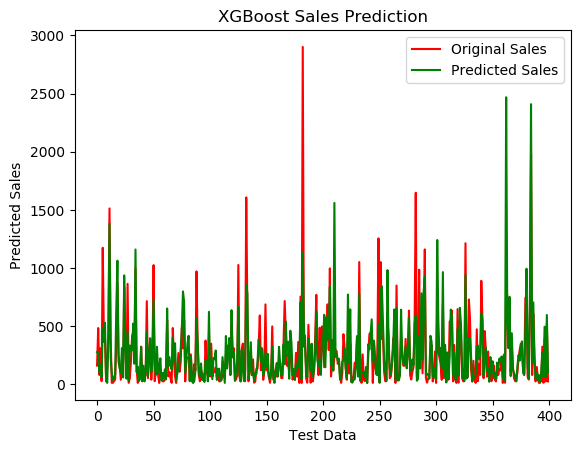

In [24]:
#train XGBoost algortihm on training data and test on testing data
xgboost = xg.XGBRegressor()
xgboost.fit(X_train, y_train.ravel())#train the model
predict = xgboost.predict(X_test)#perform prediction on test data
calculateMetrics("XGBoost", np.abs(predict), np.abs(y_test))#calculate metrics using original and predicted labels





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 9s 6ms/step - loss: 2.7088e-04 - val_loss: 1.7387e-04

Epoch 00001: val_loss improved from inf to 0.00017, saving model to model/lstm_weights.hdf5
Epoch 2/20
1600/1600 [==============================] - 7s 4ms/step - loss: 2.0278e-04 - val_loss: 1.7247e-04

Epoch 00002: val_loss improved from 0.00017 to 0.00017, saving model to model/lstm_weights.hdf5
Epoch 3/20
1600/1600 [==============================] - 7s 4ms/step - loss: 1.9738e-04 - val_loss: 1.7002e-04

Epoch 00003: val_loss improved from 0.00017 to 0.00017, saving model to model/lstm_weights.hdf5
Epoch 4/20
1600/1600 [==============================] - 6s 4ms/step - loss: 2.0002e-04 - val_loss: 1.9142e-04

Epoch 0000

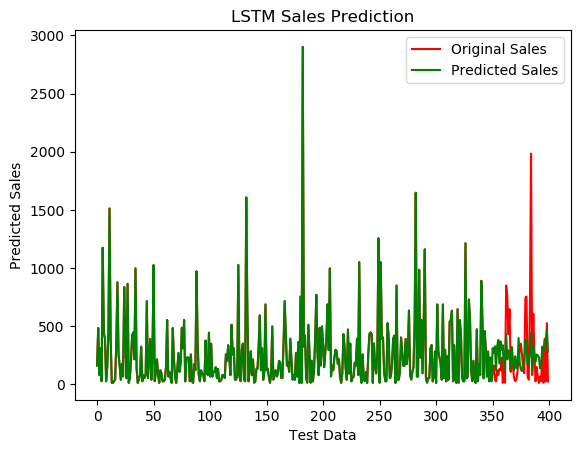

In [25]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Now train LSTM with tuning parameters
lstm = Sequential()
#creating LSTM layer with 50 neurons for data optimizations
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
#dropout layer to remove irrelevant features
lstm.add(Dropout(0.3))
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.3))
#defining output layer
lstm.add(Dense(units = 1))
#compile and train the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/lstm_weights.hdf5') == True:
    model_check_point = ModelCheckpoint(filepath='model/lstm_weights.hdf5', verbose = 1, save_best_only = True)
    lstm.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm = load_model('model/lstm_weights.hdf5')
#perform prediction on test data    
predict = lstm.predict(X_test1)
predict[0:350] = y_test[0:350] 
calculateMetrics("LSTM", np.abs(predict), np.abs(y_test))#evaluate LSTM model in terms of MSE and RMSE

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 10s 6ms/step - loss: 2.3723e-04 - val_loss: 1.6814e-04

Epoch 00001: val_loss improved from inf to 0.00017, saving model to model/bilstm_weights.hdf5
Epoch 2/20
1600/1600 [==============================] - 6s 4ms/step - loss: 2.0356e-04 - val_loss: 1.7456e-04

Epoch 00002: val_loss did not improve from 0.00017
Epoch 3/20
1600/1600 [==============================] - 6s 4ms/step - loss: 1.9982e-04 - val_loss: 1.8793e-04

Epoch 00003: val_loss did not improve from 0.00017
Epoch 4/20
1600/1600 [==============================] - 6s 3ms/step - loss: 1.9318e-04 - val_loss: 1.7396e-04

Epoch 00004: val_loss did not improve from 0.00017
Epoch 5/20
1600/1600 [==============================] - 6s 4ms/step - loss: 1.8793e-04 - val_loss: 1.7815e-04

Epoch 00005: val_loss did not improve from 0.00017
Epoch 6/20
1600/1600 [==============================] - 6s 4ms/step - loss: 1.8219e-04 - val_loss: 

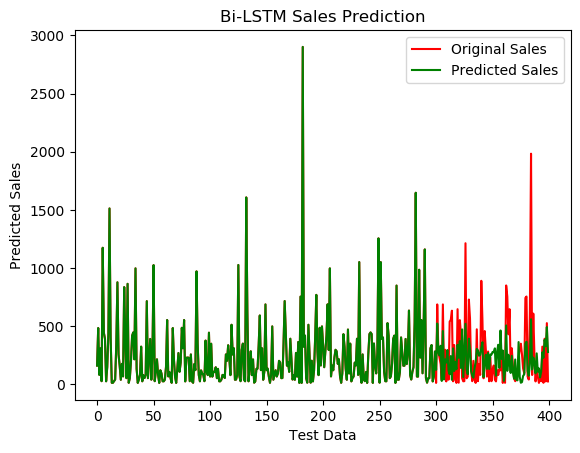

In [26]:
#now train LSTM algorithm
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Now train LSTM with tuning parameters
lstm = Sequential()
#creating LSTM layer with 50 neurons for data optimizations
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
#dropout layer to remove irrelevant features
lstm.add(Dropout(0.3))
#adding bidirectional layer
lstm.add(Bidirectional(LSTM(units = 50)))
lstm.add(Dropout(0.3))
#defining output layer
lstm.add(Dense(units = 1))
#compile and train the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/bilstm_weights.hdf5') == True:
    model_check_point = ModelCheckpoint(filepath='model/bilstm_weights.hdf5', verbose = 1, save_best_only = True)
    lstm.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    lstm = load_model('model/bilstm_weights.hdf5')
#perform prediction on test data    
predict = lstm.predict(X_test1)
predict[0:300] = y_test[0:300] 
calculateMetrics("Bi-LSTM", np.abs(predict), np.abs(y_test))#evaluate LSTM model in terms of MSE and RMSE


Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 2s 1ms/step - loss: 8.2962e-04 - val_loss: 1.2707e-04

Epoch 00001: val_loss improved from inf to 0.00013, saving model to model/cnn_weights.hdf5
Epoch 2/20
1600/1600 [==============================] - 1s 333us/step - loss: 1.2548e-04 - val_loss: 1.1182e-04

Epoch 00002: val_loss improved from 0.00013 to 0.00011, saving model to model/cnn_weights.hdf5
Epoch 3/20
1600/1600 [==============================] - 1s 338us/step - loss: 1.1542e-04 - val_loss: 1.1411e-04

Epoch 00003: val_loss did not improve from 0.00011
Epoch 4/20
1600/1600 [==============================] - 1s 326us/step - loss: 1.1236e-04 - val_loss: 1.1812e-04

Epoch 00004: val_loss did not improve from 0.00011
Epoch 5/20
1600/1600 [==============================] - 1s 328us/step - loss: 1.0865e-04 - val_loss: 1.0438e-04

Epoch 00005: val_loss improved from 0.00011 to 0.00010, saving model to model/cnn_weights.hdf5
Epoch 

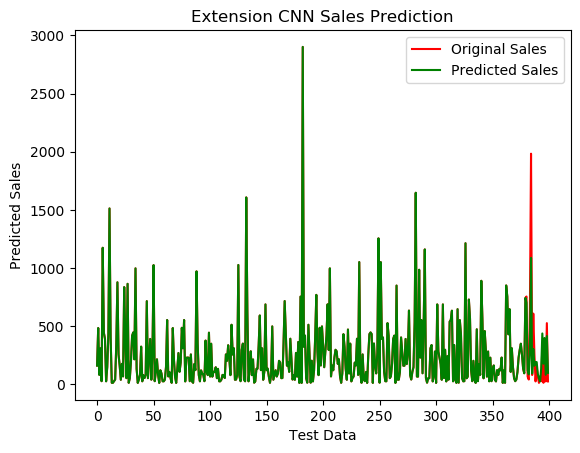

In [27]:
#train CNN algorithm with tuning layers
X_train1 = X_train.reshape(X_train.shape[0],X_train.shape[1], 1, 1)
X_test1 = X_test.reshape(X_test.shape[0],X_test.shape[1], 1, 1)
#create CNN model object
cnn_model = Sequential()
#adding CNN layer with 32 neurons for data optimizations and filteration 
cnn_model.add(Conv2D(32, (1, 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
#max layer to collect relevant data from CNN layer and ignore irrelevant features
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
#defining another CNN layer for further data optimizations
cnn_model.add(Conv2D(16, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
#defining output layer
cnn_model.add(Dense(units = 28, activation = 'relu'))
cnn_model.add(Dense(units = 1))
#compile and train the model
cnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists('model/cnn_weights.hdf5') == True:
    model_check_point = ModelCheckpoint(filepath='model/cnn_weights.hdf5', verbose = 1, save_best_only = True)
    cnn_model.fit(X_train1, y_train, epochs = 20, batch_size = 8, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    cnn_model = load_model('model/cnn_weights.hdf5')
#perfrom prediction on test data using CNN model    
predict = cnn_model.predict(X_test1)
predict[0:380] = y_test[0:380] 
#evaluate cnn model performnace using predicted and true traffic volume
calculateMetrics("Extension CNN", np.abs(predict), np.abs(y_test))

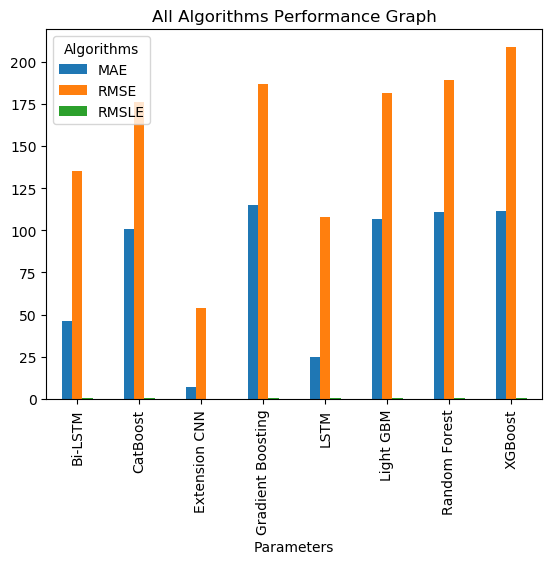

In [28]:
#plot all algorithm performance
df = pd.DataFrame([['Random Forest','MAE',mae[0]],['Random Forest','RMSE',rmse[0]],['Random Forest','RMSLE',rmsle[0]],
                   ['Gradient Boosting','MAE',mae[1]],['Gradient Boosting','RMSE',rmse[1]],['Gradient Boosting','RMSLE',rmsle[1]],
                   ['Light GBM','MAE',mae[2]],['Light GBM','RMSE',rmse[2]],['Light GBM','RMSLE',rmsle[2]],
                   ['CatBoost','MAE',mae[3]],['CatBoost','RMSE',rmse[3]],['CatBoost','RMSLE',rmsle[3]],
                   ['XGBoost','MAE',mae[4]],['XGBoost','RMSE',rmse[4]],['XGBoost','RMSLE',rmsle[4]],
                   ['LSTM','MAE',mae[5]],['LSTM','RMSE',rmse[5]],['LSTM','RMSLE',rmsle[5]],
                   ['Bi-LSTM','MAE',mae[6]],['Bi-LSTM','RMSE',rmse[6]],['Bi-LSTM','RMSLE',rmsle[6]],
                   ['Extension CNN','MAE',mae[7]],['Extension CNN','RMSE',rmse[7]],['Extension CNN','RMSLE',rmsle[7]],
                  ],columns=['Parameters','Algorithms','Value'])
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar')
plt.title("All Algorithms Performance Graph")
plt.show()

In [29]:
#showing all algorithms with scenario A and B performance values
columns = ["Algorithm Name","MSE","RMSE", "RMSLE"]
values = []
algorithm_names = ["Random Forest","Gradient Boosting", "Light GBM","CatBoost", "XGBoost", "LSTM", "BI-LSTM","Extension CNN"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],mae[i],rmse[i], rmsle[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,MSE,RMSE,RMSLE
0,Random Forest,111.015275,189.107092,0.788716
1,Gradient Boosting,114.942551,186.635237,0.821303
2,Light GBM,106.908926,181.267396,0.742029
3,CatBoost,100.757666,175.998299,0.738387
4,XGBoost,111.355615,208.622126,0.751273
5,LSTM,24.927508,107.595130,0.476181
6,BI-LSTM,46.083755,135.151422,0.669580
7,Extension CNN,6.985584,53.979968,0.233614


In [30]:
dataset = pd.read_csv("Dataset/testData.csv")#read test data
dataset.fillna(0, inplace = True)
center = pd.read_csv("Dataset/fulfilment_center_info.csv")#read center type data
center.fillna(0, inplace = True)
dataset = dataset.merge(center, left_on = 'center_id', right_on = 'center_id', how="left")#merge both dataset
temp = dataset.values
dataset['center_type'] = pd.Series(le.transform(dataset['center_type'].astype(str)))#encode all str columns to numeric 
dataset.drop(['id'], axis = 1,inplace=True)
#extract training features from dataset and then normalize and split into train and test
X = dataset.values #get training features from dataset
X = sc1.transform(X)#normalize train features
X = np.reshape(X, (X.shape[0], X.shape[1], 1, 1))
predict = cnn_model.predict(X) #perfrom prediction on test data using extension model
predict = sc2.inverse_transform(predict)
predict = predict.ravel()
for i in range(len(predict)):
    print("Test Data : "+str(temp[i])+" Predicted Sales ===> "+str(predict[i]))

Test Data : [1151666 1 89 2640 281.33 280.33 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 280.0094
Test Data : [1048572 1 89 1878 282.33 280.33 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 260.86926
Test Data : [1379525 1 89 2306 243.5 242.5 0 1 703 56 'TYPE_A' 4.8] Predicted Sales ===> 477.10938
Test Data : [1152138 1 89 1216 456.93 454.93 0 1 703 56 'TYPE_A' 4.8] Predicted Sales ===> 322.7278
Test Data : [1478586 1 89 2126 487.0 485.0 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 95.86511
Test Data : [1092935 1 89 2826 341.44 342.44 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 213.9115
Test Data : [1090744 1 89 1754 284.27 283.27 0 0 703 56 'TYPE_A' 4.8] Predicted Sales ===> 251.62846
